# Initializing Data

In [1]:
# Import initial dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Read in CSV
jobs_csv = "Resources/Google_job_skills.csv"

In [3]:
# Read in data and store in Pandas dataframe
jobs_df = pd.read_csv(jobs_csv)
jobs_df.columns = ["Company", "Title", "Category", "Location", "Responsibilities", "Min_qual", "Pref_qual"]
jobs_df.head(10)

,Company,Title,Category,Location,Responsibilities,Min_qual,Pref_qual
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
5,Google,"Associate Account Strategist (Czech/Slovak), G...",Technical Solutions,"Dublin, Ireland",Communicate with customers via phone and email...,Bachelor's degree or equivalent practical expe...,"Experience in sales, customer service, account..."
6,Google,"Supplier Development Engineer, Camera, Consume...",Hardware Engineering,"Mountain View, CA, United States",Manage cross-functional activities in the supp...,BS degree in Engineering or equivalent practic...,Master's degree.\nExperience in the developmen...
7,Google,"Strategic Technology Partner Manager, Healthca...",Partnerships,"Sunnyvale, CA, United States",Lead the development and strategy with partner...,BA/BS degree or equivalent practical experienc...,"BA/BS degree in a technical, life sciences or ..."
8,Google,"Manufacturing Business Manager, Google Hardware",Manufacturing & Supply Chain,"Xinyi District, Taiwan",Develop CM/ODM strategy and implement supplier...,"BA/BS degree in Engineering, Supply Chain or e...",MBA degree.\nExperience in procurement and sup...
9,Google,"Solutions Architect, Healthcare and Life Scien...",Technical Solutions,"New York, NY, United States",Help compile customer requirements as well as ...,"BA/BS degree in Computer Science, related Soft...","Master's degree in Computer Science, related E..."


## Processing Columns to Get Programming Language Count

In [4]:
# Determine which skills are most desired based on word frequency
# Get word count per word in minimum qualifications and preferred qualifications columns using Pandas
pd.Series(np.concatenate([x.split() for x in jobs_df.Min_qual.astype(str)])).value_counts()

in              2357
or              2209
and             2043
a               1153
experience.     1113
                ... 
common             1
Eligibility        1
launch-ready       1
community          1
stamping,          1
Length: 3245, dtype: int64

In [5]:
pd.Series(np.concatenate([x.split() for x in jobs_df.Pref_qual.astype(str)])).value_counts()

and                            6244
to                             2965
in                             2456
with                           2411
of                             1639
                               ... 
allocations                       1
web-research,                     1
telecom/technology/consumer       1
brand/retail                      1
X,                                1
Length: 5590, dtype: int64

In [6]:
# Changing method to use qualifcation strings and list of programming languages to view only relevant results
# Creating a list of programming languages to abbreviated as pl
# List is created using the top 20 as provided by towardsdatascience.com
pl = ["Java", "C", "Python", "C++", "C#", "Visual Basic .NET", "JavaScript", "PHP", "Swift", "SQL", "Ruby", "Delphi", "Objective-C", "Go", 
      "Assembly language", "Visual Basic", "D", "R", "Perl", "MATLAB"]

In [7]:
# importing regular expression dependency
import re

In [8]:
# converting column to list of strings for regular expression
Min_qual_text = jobs_df.Min_qual.tolist()
Min_qual_text = ''.join(map(str, Min_qual_text))

In [9]:
# chekcing list
print(Min_qual_text)

BA/BS degree or equivalent practical experience.
3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.BS degree in an Engineering discipline or equivalent practical experience.
7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.
Experience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.
Ability to speak and write in English and Mandarin fluently and idiomatically.Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.
2 years of work experience in business analysis.
1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.
1 year of experience developing and manipulating large datasets.BA/BS degree in Computer Science or equivalent practical experience.
Experience workin

In [10]:
# Using regular expression to count the value of each word in pl for min qual and pref qual columns
pl_count = dict((x,0) for x in pl)
for p in re.findall(r"[\w'+#-]+|[.!?;’]", Min_qual_text):
    if p in pl_count:
        pl_count[p] += 1
# print
print(pl_count)

{'Java': 76, 'C': 18, 'Python': 97, 'C++': 54, 'C#': 15, 'Visual Basic .NET': 0, 'JavaScript': 74, 'PHP': 7, 'Swift': 0, 'SQL': 73, 'Ruby': 14, 'Delphi': 0, 'Objective-C': 3, 'Go': 26, 'Assembly language': 0, 'Visual Basic': 0, 'D': 6, 'R': 37, 'Perl': 6, 'MATLAB': 16}


In [11]:
# repeating process for preferred qualifications
# converting column to list of strings for regular expression
Pref_qual_text = jobs_df.Pref_qual.tolist()
Pref_qual_text = ''.join(map(str, Pref_qual_text))

In [12]:
pl_count2 = dict((x,0) for x in pl)
for p in re.findall(r"[\w'+#-]+|[.!?;’]", Pref_qual_text):
    if p in pl_count2:
        pl_count2[p] += 1
# print
print(pl_count2)

{'Java': 50, 'C': 20, 'Python': 79, 'C++': 35, 'C#': 6, 'Visual Basic .NET': 0, 'JavaScript': 57, 'PHP': 21, 'Swift': 2, 'SQL': 64, 'Ruby': 6, 'Delphi': 0, 'Objective-C': 5, 'Go': 9, 'Assembly language': 0, 'Visual Basic': 0, 'D': 9, 'R': 20, 'Perl': 11, 'MATLAB': 6}


## Programming Language Visualization

In [13]:
# import matplotlib dependency
import matplotlib.pyplot as plt

In [14]:
# creating x and y axis for plots
Min_Keys = pl_count.keys()
Min_Values = pl_count.values()

Pref_Keys = pl_count2.keys()
Pref_Values = pl_count2.values()

<BarContainer object of 20 artists>

<Figure size 432x288 with 0 Axes>

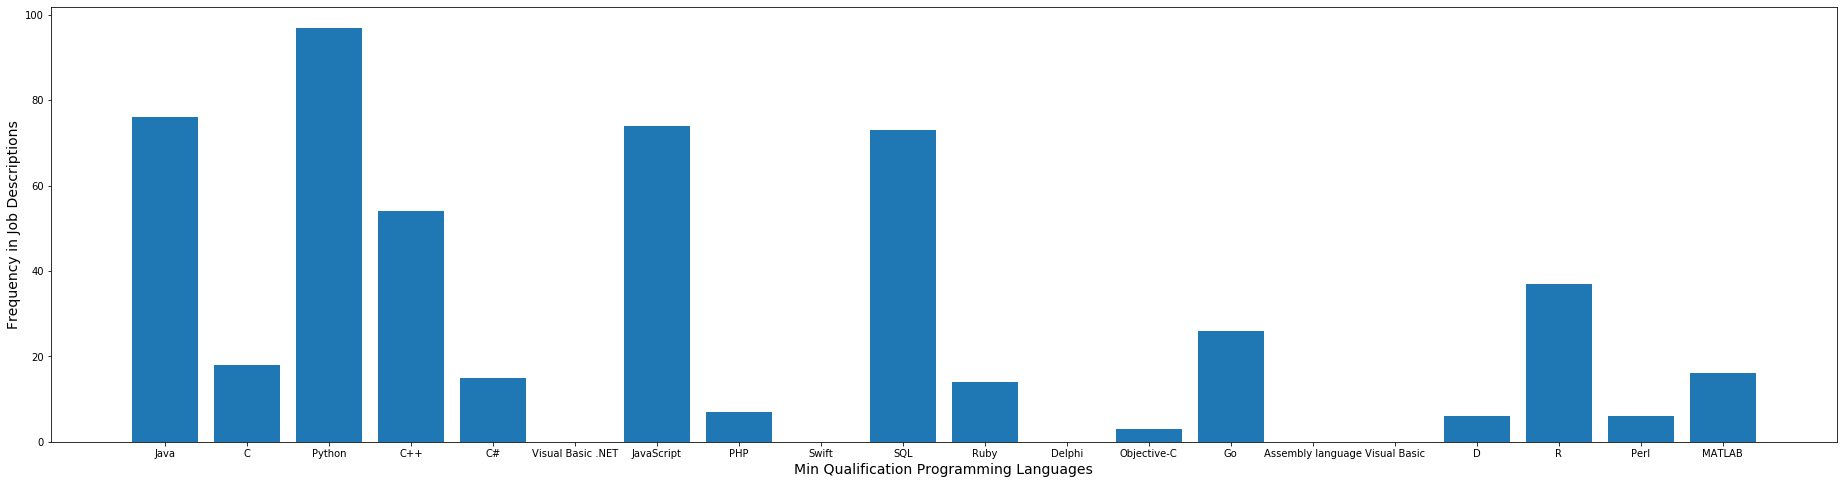

In [15]:
# Creating visual
from matplotlib.pyplot import figure
plt.figure("Minimum Qualifications")
plt.figure(figsize=(32,8))
plt.xlabel('Min Qualification Programming Languages', fontsize=14)
plt.ylabel('Frequency in Job Descriptions', fontsize=14)
plt.bar(Min_Keys, Min_Values)

<BarContainer object of 20 artists>

<Figure size 432x288 with 0 Axes>

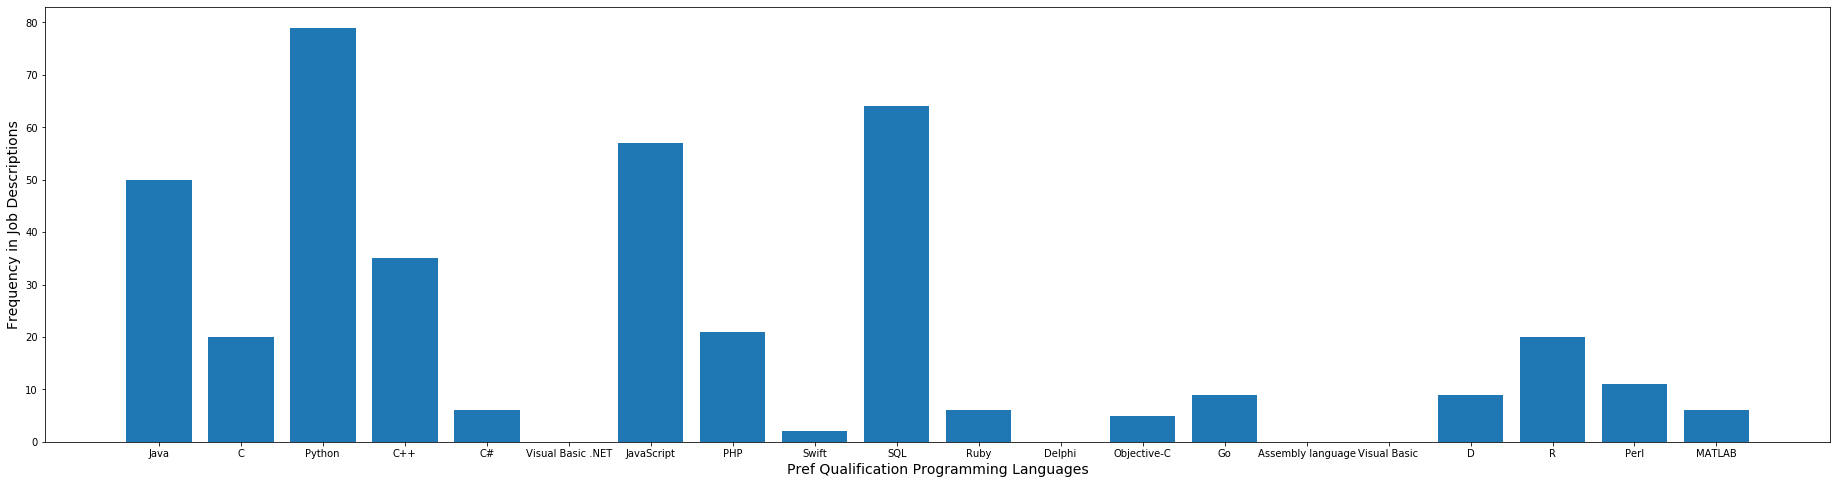

In [16]:
plt.figure("Preferred Qualifications")
plt.figure(figsize=(32,8))
plt.xlabel('Pref Qualification Programming Languages', fontsize=14)
plt.ylabel('Frequency in Job Descriptions', fontsize=14)
plt.bar(Pref_Keys, Pref_Values)

In [38]:
# Converting series to list for deeper visualizations with iplot

pl_count_items = pl_count.items()
pl_count_list = list(pl_count_items)

pldf1 = pd.DataFrame(pl_count_list)
pldf1.columns = ["Programming Language", "Frequency"]
pldf1["Frequency"] = pldf1["Frequency"].astype(int)
pldf1

,Programming Language,Frequency
0,Java,76
1,C,18
2,Python,97
3,C++,54
4,C#,15
5,Visual Basic .NET,0
6,JavaScript,74
7,PHP,7
8,Swift,0
9,SQL,73


In [42]:
pl_count2_items = pl_count2.items()
pl_count2_list = list(pl_count2_items)

pldf2 = pd.DataFrame(pl_count2_list)
pldf2.columns = ["Programming Language", "Frequency2"]
pldf2["Frequency2"] = pldf2["Frequency2"].astype(int)
pldf2

,Programming Language,Frequency2
0,Java,50
1,C,20
2,Python,79
3,C++,35
4,C#,6
5,Visual Basic .NET,0
6,JavaScript,57
7,PHP,21
8,Swift,2
9,SQL,64


In [44]:
# Creating third data frame joining the first two on Programming Language
df3 = pd.merge(pldf1, pldf2, on="Programming Language")
df3

,Programming Language,Frequency,Frequency2
0,Java,76,50
1,C,18,20
2,Python,97,79
3,C++,54,35
4,C#,15,6
5,Visual Basic .NET,0,0
6,JavaScript,74,57
7,PHP,7,21
8,Swift,0,2
9,SQL,73,64


In [48]:
# Creating interactive visual between Minimum and Preferred Languages
# Frequency 2 correlates with the Preferred Qualifications Data
df3.iplot(
    y='Frequency', mode='markers', secondary_y = 'Frequency2',
    secondary_y_title='Frequency2', xTitle='Programming Language', yTitle='Frequency',
    text='Programming Language',x = "Programming Language", title='Language Comparison as Minimum Requirement and Preference')

## Process and Visualize Job Location and Frequency

In [17]:
# Group df by location, get count by location, Sort by ASC
Locations = jobs_df.groupby("Location").count()
Locations = Locations["Company"]
Locations = Locations.sort_values()
Locations

Location
Nairobi, Kenya                         1
Kyiv, Ukraine                          1
Prague, Czechia                        1
Lisbon, Portugal                       1
Salt Lake City, UT, United States      1
                                    ... 
London, United Kingdom                62
New York, NY, United States           70
Dublin, Ireland                       87
Sunnyvale, CA, United States         155
Mountain View, CA, United States     190
Name: Company, Length: 92, dtype: int64

In [18]:
# Visualize using plotly for interactivity
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [22]:
# Single Variable Distributions Histogram by Location
jobs_df['Location'].iplot(kind='hist', xTitle='Locations',
                  yTitle='Count', title='Frequency of Google Job Locations')

## Visual by job Category

In [23]:
# Single Variable Distributions Histogram by Category
jobs_df['Category'].iplot(kind='hist', xTitle='Categories',
                  yTitle='Count', title='Frequency of Google Job Categories')

## Visualizing Programming Language and Job Category By Location

In [51]:
# Generating World Map to capture all job locations
# Import dependency citipy
from citipy import citipy

In [52]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [53]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-82.07000005138826, 146.2941647051257),
 (-68.72992647982002, -106.94908560146692),
 (-84.07186621349919, -61.62101249267039),
 (-63.698517124435604, -38.27869203981311),
 (71.1905140664339, 161.748141763847),
 (-48.53853331399646, 113.02610885962957),
 (-79.42581416524487, -123.35983810591638),
 (8.188186696660921, -41.190010231562525),
 (-83.35168273630566, 147.2746622154923),
 (-38.082073550545, 158.92738738238023),
 (31.34331014158677, -148.5287595073035),
 (76.23132243668323, -178.82873196708613),
 (44.7537773580747, 171.4885403473835),
 (-15.503325406598478, -145.98212602761882),
 (-65.61286413630229, 75.82449618883345),
 (-59.6141362630028, 42.053778387057434),
 (16.678340914546325, 19.27589667350469),
 (-37.906628472441994, -137.20645190775664),
 (78.49693396844049, 60.39771176037158),
 (70.06015115244253, -115.05545313774128),
 (72.3979992904109, -5.791545744922672),
 (70.22857454340496, -82.83265265994709),
 (-74.98797286014818, -136.83419243669994),
 (-42.95590857347143, 1

In [54]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [65]:
jobs_df

,Company,Title,Category,Location,Responsibilities,Min_qual,Pref_qual
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...,...,...,...
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States",Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States",Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan",Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Google,Physical Security Manager,Real Estate & Workplace Services,"Tel Aviv-Yafo, Israel",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [67]:
city_df = jobs_df[["Location", "Category", "Min_qual", "Pref_qual"]].copy()
city_df

,Location,Category,Min_qual,Pref_qual
0,Singapore,Program Management,BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,"Shanghai, China",Manufacturing & Supply Chain,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,"New York, NY, United States",Technical Solutions,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,"Mountain View, CA, United States",Developer Relations,BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,"Sunnyvale, CA, United States",Program Management,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...
1245,"Boulder, CO, United States",Real Estate & Workplace Services,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,"Boulder, CO, United States",Real Estate & Workplace Services,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,"Xinyi District, Taiwan",Real Estate & Workplace Services,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,"Tel Aviv-Yafo, Israel",Real Estate & Workplace Services,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'